In [386]:
import numpy as np
import matplotlib as plt
import csv
import os
import re
import pandas as pd
from matplotlib import cycler

In [387]:
# colors = cycler('color',
#                 ['#EE6666', '#3388BB', '#9988DD',
#                  '#EECC55', '#88BB44', '#FFBBBB'])
# # plt.rc('axes', facecolor='#E6E6E6', edgecolor='none')
# # plt.rc('grid', color='w', linestyle='solid')
# # plt.rc('patch', edgecolor='#E6E6E6')
# plt.rc('lines', linewidth=2)
plt.style.use('default')

In [388]:
def convert_to_float(s):
    i = 0
    while i < len(s.T):
        try:
            s.iloc[:,i] = float(s.iloc[:,i])
            return s
        except:
            return s
        
def xps_plot(df,samplename,element):
    ax = df.plot()
    ax.legend(frameon=False)
    ax.set_yticks([])
    ax.margins(x=0)
    title = "{} - {}".format(sample_name, element)
    ax.set_title(title)
    ax.figure.savefig(element + 'LSV.png')
    
def getfilename():
    path = os.getcwd()    
    filewithext = []
    filename = []
    for file in [doc for doc in os.listdir(path) if doc.endswith('.xls')]:  
        filewithext.append(file)
        filename.append(file.replace(".xls",""))
    return(filewithext, filename)

In [389]:
filename_ls=getfilename()[0]
filename_ls

['901xpsfitted.xls', 'test.xls']

In [390]:
#df = pd.read_excel('test.xls')
filename = filename_ls[1]
xls = pd.ExcelFile(filename)
x_tag = []
raw_tag = []
simu_y = []

In [391]:

#get the needed data sheets in the excel file
sheet_names_ls = xls.sheet_names
not_useful_str_ls = ['Titles',"Sheet"]
#needed_sheets_ls = list(filter(lambda x: re.sea/rch('Scan', x) or re.search('Survey', x) , sheet_names_ls))
needed_sheets_ls = list(filter(lambda x: re.search('Scan', x), sheet_names_ls))
needed_sheets_ls

['O1s Scan', 'C1s Scan']

In [392]:
#define raw as my new empty dataframe
raw = pd.DataFrame()
raw_dict = {}
#got an empty dictionary to store my XPS data

#This reads all the sheets in my dictionary
for key in needed_sheets_ls:
    raw_dict[key] = pd.read_excel(filename,sheet_name = key)
# df = raw_dict[needed_sheets_ls[0]]
# raw_dict


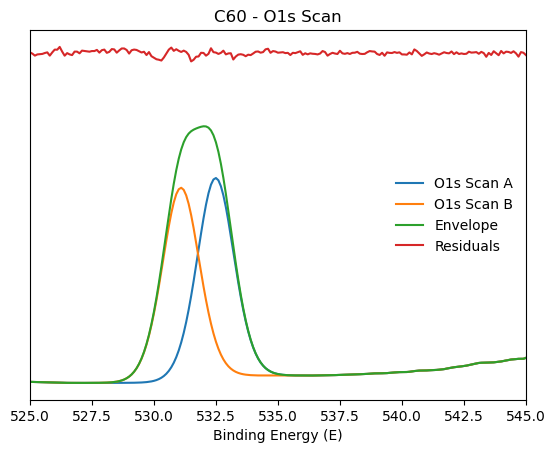

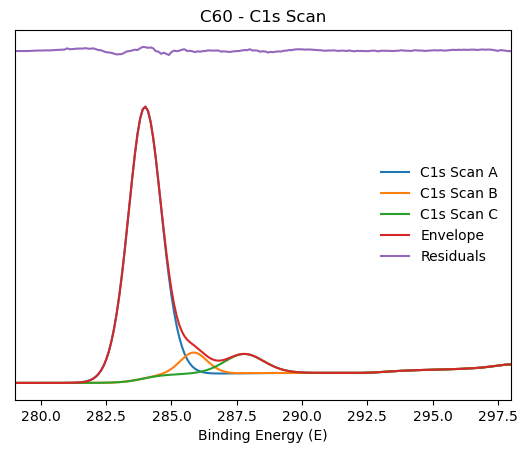

In [393]:
i = 0
for key in raw_dict:
    df = raw_dict[needed_sheets_ls[i]]
    raw_data_name = df.iloc[1]['Experiment Descriptions :']
    sample_name = re.sub('\d*\\\\\w*\s\d*祄\\\\','',raw_data_name)
    header_pos = df[df['Unnamed: 0']=='Binding Energy (E)'].index.values
    df.rename(columns=df.iloc[header_pos[0]], inplace = True)
    header_ls = list(df.iloc[header_pos[0]])
    unit_ls = list(df.iloc[header_pos[0]+1])
    header_ls = [x for x in header_ls if str(x) != 'nan' and str(x) != 'Backgnd.']
    unit_ls = [x for x in unit_ls if str(x) != 'nan' and str(x) != 'Backgnd.']
    raw = df.iloc[header_pos[0]+2:]
    raw = raw[header_ls]
    raw = convert_to_float(raw)
    raw.dropna()
    raw.set_index('Binding Energy (E)',inplace=True)
    raw['Residuals']=raw['Residuals']+raw['Envelope'].max()*1.2
    clean_xps = raw
    xps_plot(clean_xps,sample_name,needed_sheets_ls[i])
    i += 1

In [394]:
#need to update the dictionary raw_dict with processed data values

#Append all processed data in to one pandas dataframe

#Group data frame by sample name and then each element